<a href="https://colab.research.google.com/github/erstuu/Gym-Member-Exercise/blob/main/2230511063_UTS_ML_GymMemberExerciseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Kondisi Data**


1. Sebagian data memiliki nilai yang tidak valid
2. Terdapat duplikasi data
3. Nilai yang hilang

# **Pengumpulan data**

In [31]:
path = "./Gym-Members-Exercise-Dataset.csv"
gym_df = pd.read_csv(path)

In [ ]:
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56.0,Male,74.2,1.68,196.0,151.0,72.0,2.0,593.0,Strength,25.0,2.4,5,2.0,26.3
1,46.0,Female,84.6,1.82,181.0,143.0,63.0,1.3,526.0,Cardio,24.1,2.1,4,3.0,25.5
2,32.0,Female,63.5,1.83,188.0,142.0,63.0,1.0,670.0,Strength,25.6,2.1,3,2.0,19.0
3,25.0,Female,62.2,1.93,173.0,151.0,65.0,0.9,314.0,cardio,12.9,2.0,2,3.0,16.7
4,38.0,Male,58.4,1.62,187.0,156.0,78.0,1.0,NaN,Flexibility,14.1,2.0,5,1.0,22.3


# **Penilaian Data**

In [32]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            98 non-null     float64
 1   Gender                         98 non-null     object 
 2   Weight (kg)                    98 non-null     float64
 3   Height (m)                     98 non-null     float64
 4   Max_BPM                        98 non-null     float64
 5   Avg_BPM                        98 non-null     float64
 6   Resting_BPM                    98 non-null     float64
 7   Session_Duration (hours)       98 non-null     float64
 8   Calories_Burned                98 non-null     float64
 9   Workout_Type                   98 non-null     object 
 10  Fat_Percentage                 97 non-null     float64
 11  Water_Intake (liters)          98 non-null     float64
 12  Workout_Frequency (days/week)  98 non-null     obj

In [33]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,97.000000,98.000000,99.000000,98.000000
mean,37.755102,63.472449,1.724898,184.989796,149.020408,68.928571,1.482653,481.448980,19.540206,2.098980,2.000000,21.078571
std,12.628769,45.501675,0.143471,14.119881,16.884678,5.882439,0.541290,118.434994,5.520599,0.535829,0.820652,17.170745
min,18.000000,-92.500000,1.500000,160.000000,120.000000,60.000000,0.500000,300.000000,10.200000,1.100000,1.000000,-35.100000
25%,26.000000,62.225000,1.600000,172.250000,135.000000,64.000000,1.000000,382.750000,14.700000,1.700000,1.000000,19.975000
50%,38.000000,74.500000,1.710000,186.500000,147.000000,69.000000,1.500000,475.500000,19.600000,2.100000,2.000000,24.600000
75%,47.750000,86.600000,1.837500,195.000000,163.750000,74.000000,1.900000,586.250000,24.500000,2.500000,3.000000,30.450000
max,59.000000,99.900000,2.000000,209.000000,178.000000,79.000000,2.500000,693.000000,29.500000,3.000000,3.000000,42.700000


In [34]:
gym_df.isna().sum()

,0
Age,5
Gender,5
Weight (kg),5
Height (m),5
Max_BPM,5
Avg_BPM,5
Resting_BPM,5
Session_Duration (hours),5
Calories_Burned,5
Workout_Type,5


In [35]:
gym_df.duplicated().sum()

np.int64(3)

Hasil analisis awal, yaitu data mempunyai beberapa masalah, seperti : Data hilang, Duplikat, dan juga tidak akurat. Maka diperlukan pembersihan data, agar hasil analisis nantinya sesuai ekspektasi

# **Pembersihan Data**

## 1. Menghapus data duplikat

In [37]:
# Menghapus duplikasi data
gym_df.drop_duplicates(inplace=True)

# Cek kembali data yang duplikat
gym_df.duplicated().sum()

np.int64(0)

## 2. Menangani nilai yang tidak valid, yaitu kolom Weight dan BMI

In [170]:
gym_df.loc[gym_df['Weight (kg)'] <= 0, 'Weight (kg)'] = gym_df[gym_df['Weight (kg)'] > 0]['Weight (kg)'].mean()
gym_df.loc[gym_df.BMI <= 0, 'BMI'] = gym_df[gym_df.BMI > 0]['BMI'].mean()

## 3. Menangani data yang hilang atau *Missing Value*

Kolom Age

In [ ]:
# Cek missing value Age
gym_df[gym_df.Age.isna()]

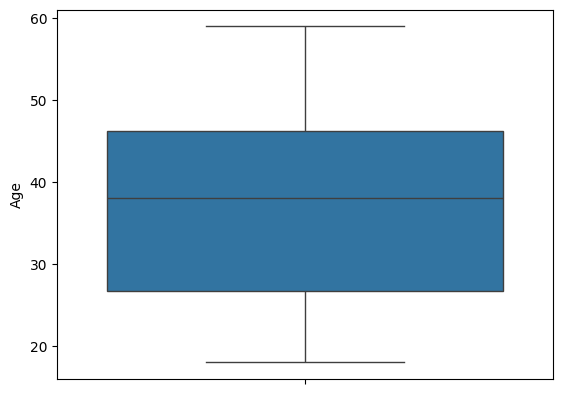

In [102]:
# Cek outlier Age
sns.boxplot(gym_df.Age)
plt.show()

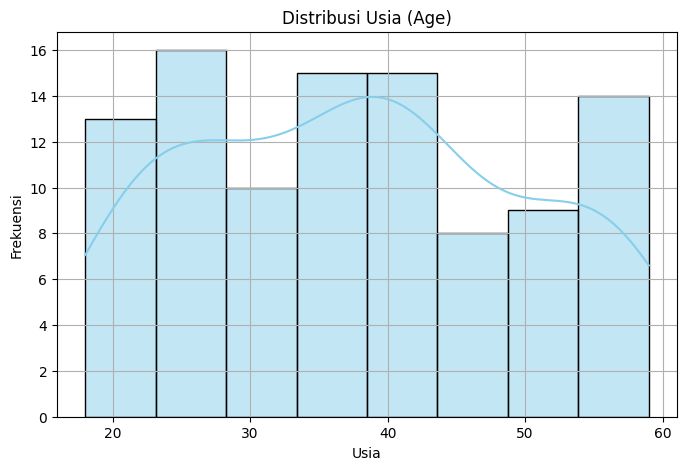

In [104]:
# Cek Distribusi Age
plt.figure(figsize=(8, 5))
sns.histplot(gym_df['Age'], bins='auto', kde=True, color='skyblue')
plt.title('Distribusi Usia (Age)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [89]:
# Karena distribusinya tidak linear, maka kolom kosong pada Age menggunakan nilai tengah(Median)
gym_df['Age'].fillna(gym_df['Age'].median(), inplace=True)

Kolom Gender

In [ ]:
gym_df[gym_df.Gender.isna()]

In [95]:
gym_df.Gender.value_counts()

,count
Gender,
Male,51
Female,44


In [94]:
gym_df.Gender = gym_df.Gender.replace({
    'male': 'Male',
    'Fmale': 'Female',
    'FeMale': 'Female',
    'Fmale ': 'Female'
})

In [99]:
# mengisi value kolom Gender dengan gender paling banyak di gym
most_common_member_gender = gym_df.Gender.mode()[0]
gym_df.Gender.fillna(most_common_member_gender, inplace=True)

Kolom Height

In [109]:
gym_df['Height (m)'].isna()

,Height (m)
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


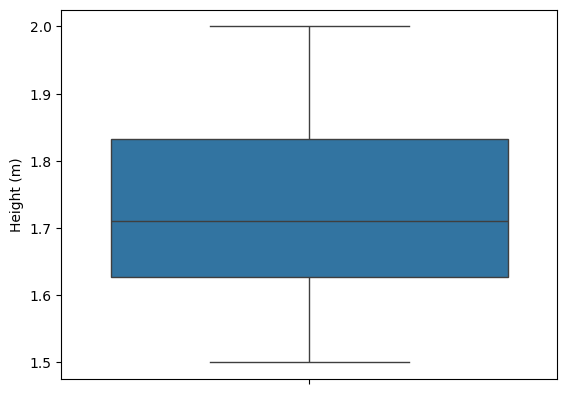

In [112]:
# Cek outlier Height
sns.boxplot(gym_df['Height (m)'])
plt.show()

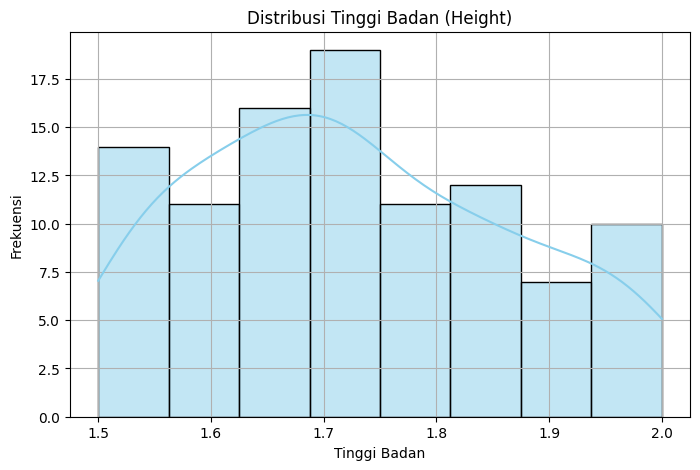

In [114]:
# Cek Distribusi Height
plt.figure(figsize=(8, 5))
sns.histplot(gym_df['Height (m)'], bins='auto', kde=True, color='skyblue')
plt.title('Distribusi Tinggi Badan (Height)')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [107]:
median_height = gym_df['Height (m)'].median()
gym_df['Height (m)'] = gym_df['Height (m)'].fillna(median_height)

Kolom Weight

In [118]:
gym_df['Weight (kg)'].isna()

,Weight (kg)
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


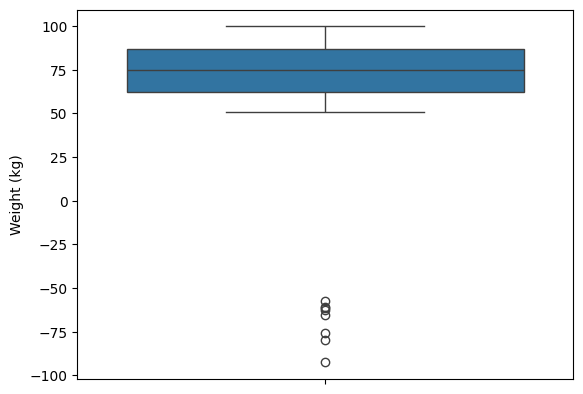

In [113]:
# Cek outlier Height
sns.boxplot(gym_df['Weight (kg)'])
plt.show()

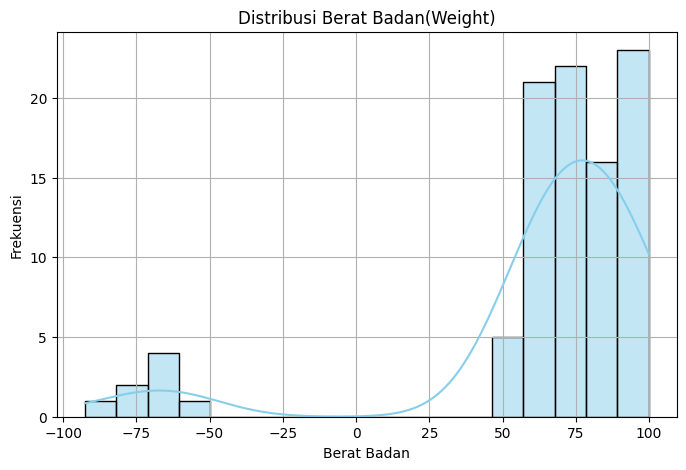

In [115]:
# Cek Distribusi Weight
plt.figure(figsize=(8, 5))
sns.histplot(gym_df['Weight (kg)'], bins='auto', kde=True, color='skyblue')
plt.title('Distribusi Berat Badan(Weight)')
plt.xlabel('Berat Badan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [116]:
# Isi value wight yang hilang dengan nilai  median
gym_df['Weight (kg)'] = gym_df['Weight (kg)'].fillna(gym_df['Weight (kg)'].median())

Kolom Max_BPM

In [121]:
gym_df[gym_df.Max_BPM.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
9,28.0,Female,62.7,2.00,NaN,142.0,66.0,0.6,572.0,Strength,20.7,2.5,1,2.0,15.7
21,38.0,Female,84.0,1.60,NaN,178.0,76.0,1.5,366.0,Cardio,24.3,2.0,3,1.0,32.8
77,58.0,Female,98.7,1.52,NaN,165.0,64.0,1.9,393.0,Flexibility,25.6,2.1,4,1.0,42.7
81,42.0,Female,74.7,1.63,NaN,128.0,NaN,0.5,502.0,Cardio,20.3,1.8,5,1.0,27.2
82,24.0,Male,99.7,1.59,NaN,169.0,76.0,2.2,691.0,Flexibility,29.5,NaN,2,1.0,39.4


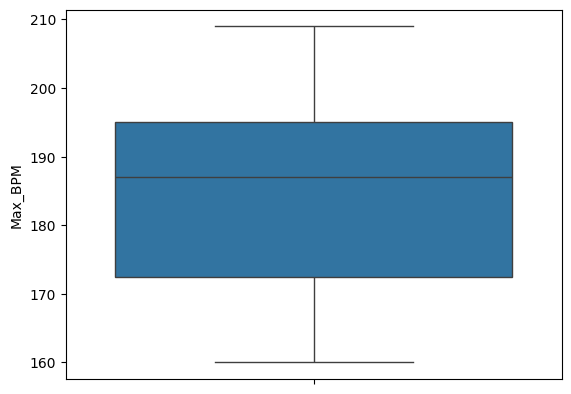

In [122]:
sns.boxplot(gym_df.Max_BPM)
plt.show()

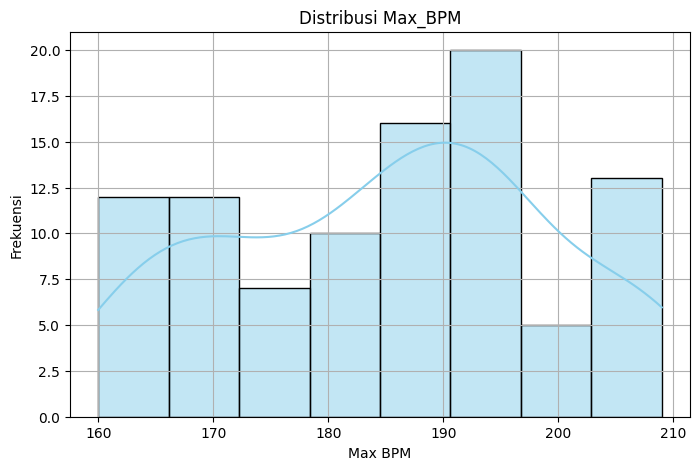

In [123]:
# Cek Distribusi Max BPM
plt.figure(figsize=(8, 5))
sns.histplot(gym_df.Max_BPM, bins='auto', kde=True, color='skyblue')
plt.title('Distribusi Max_BPM')
plt.xlabel('Max BPM')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [125]:
# mengisi value kolom Max_BPM dengan nilai rerata Max_BPM
gym_df.Max_BPM = gym_df.Max_BPM.fillna(gym_df.Max_BPM.mean())

Kolom Avg_BPM

In [57]:
gym_df[gym_df.Avg_BPM.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
20,19.0,Male,NaN,1.65,189.0,NaN,72.0,1.7,693.0,Cardio,21.3,1.4,4,2.0,30.0
31,20.0,Male,99.2,1.68,160.0,NaN,64.0,1.6,668.0,Cardio,12.8,2.6,NaN,2.0,-35.1
59,35.0,Male,99.8,1.93,203.0,NaN,76.0,2.2,436.0,Cardio,14.1,1.2,3,2.0,26.8
68,31.0,Male,70.2,1.73,182.0,NaN,65.0,1.6,305.0,Strength,28.4,1.8,NaN,1.0,23.5
93,50.0,Male,81.8,1.82,208.0,NaN,76.0,0.8,319.0,Cardio,17.0,2.7,2,3.0,-24.7


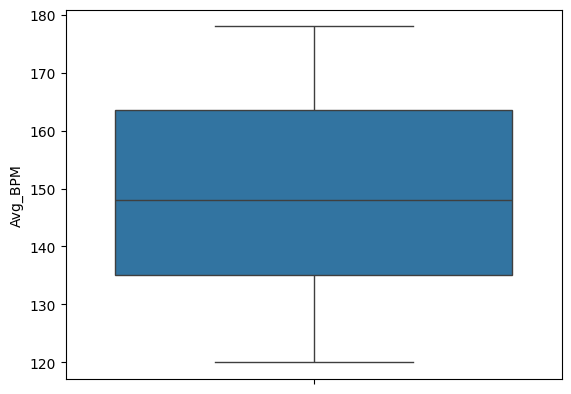

In [126]:
sns.boxplot(gym_df.Avg_BPM)
plt.show()

In [127]:
# mengisi value yang hilang dari kolom Avg_BPM dengan nilai rerata
gym_df.Avg_BPM = gym_df.Avg_BPM.fillna(gym_df.Avg_BPM.mean())

Kolom Resting_BPM

In [58]:
gym_df[gym_df.Resting_BPM.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
34,38.0,Female,89.9,NaN,163.0,171.0,NaN,1.6,341.0,NaN,24.5,1.3,5,3.0,32.6
48,52.0,NaN,91.9,1.70,192.0,172.0,NaN,0.9,497.0,Strength,12.5,2.7,4,1.0,-31.8
71,38.0,Female,96.8,1.71,167.0,129.0,NaN,2.3,374.0,cardio,28.3,1.8,NaN,1.0,33.1
81,42.0,Female,NaN,1.63,NaN,128.0,NaN,0.5,502.0,Cardio,20.3,1.8,5,1.0,27.2
88,28.0,Male,87.2,1.72,169.0,156.0,NaN,1.0,417.0,Flexibility,16.0,2.5,2,3.0,29.5


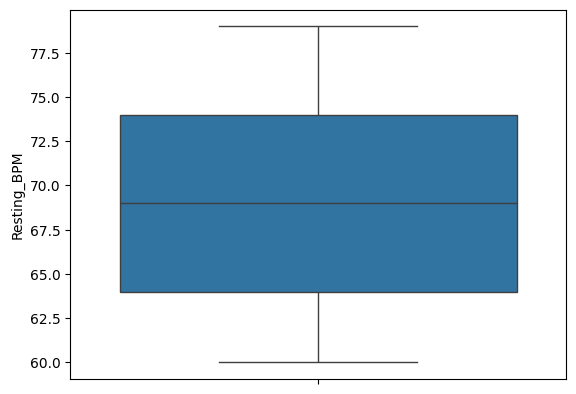

In [128]:
sns.boxplot(gym_df.Resting_BPM)
plt.show()

In [129]:
# mengisi value yang hilang dari kolom Avg_BPM dengan nilai rerata
gym_df.Resting_BPM = gym_df.Resting_BPM.fillna(gym_df.Resting_BPM.mean())

Kolom Session Duration

In [49]:
gym_df['Session_Duration (hours)'].isna()

,Session_Duration (hours)
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,True


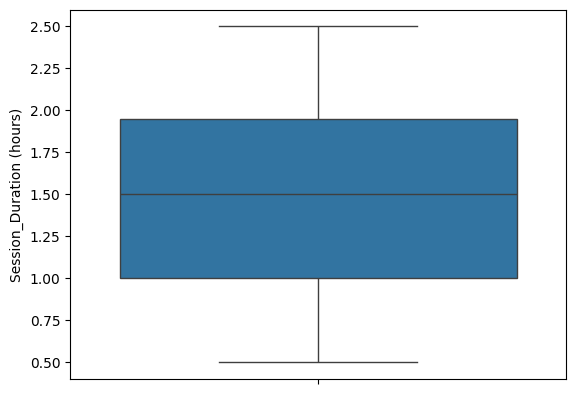

In [130]:
sns.boxplot(gym_df['Session_Duration (hours)'])
plt.show()

In [132]:
# Mengisi value yang hilang dari kolom Session_Duration dengan nilai tengah
gym_df['Session_Duration (hours)'] = gym_df['Session_Duration (hours)'].fillna(gym_df['Session_Duration (hours)'].median())

Kolom Calories_Burned

In [60]:
gym_df[gym_df.Calories_Burned.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
4,38.0,Male,58.4,1.62,187.0,156.0,78.0,1.0,NaN,Flexibility,14.1,2.0,5,1.0,22.3
7,40.0,Male,70.2,1.88,208.0,174.0,69.0,2.3,NaN,Flexibility,25.1,1.7,3,3.0,19.9
29,NaN,NaN,90.2,1.60,178.0,128.0,75.0,1.7,NaN,Strength,22.3,3.0,three,3.0,35.2
40,31.0,Female,61.0,1.71,187.0,124.0,73.0,2.1,NaN,Flexibility,NaN,2.7,5,3.0,20.9
51,53.0,Male,60.5,1.51,196.0,176.0,71.0,1.6,NaN,Cardio,13.7,2.7,6,NaN,26.5


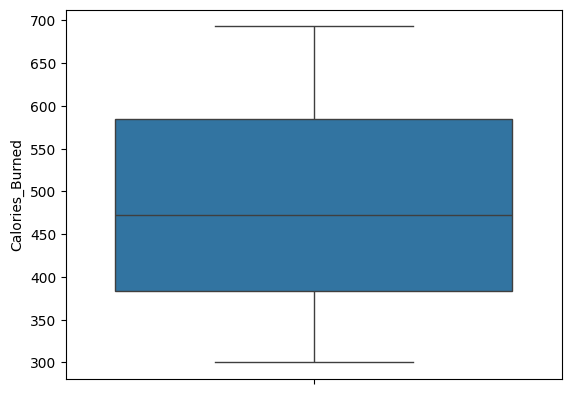

In [133]:
sns.boxplot(gym_df.Calories_Burned)
plt.show()

In [134]:
# Mengisi value yang hilang pada kolom Calories_Burned menggunakan nilai rerata
gym_df.Calories_Burned = gym_df.Calories_Burned.fillna(gym_df.Calories_Burned.mean())

Kolom Workout_Type

In [135]:
gym_df[gym_df.Workout_Type.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
8,28.0,Female,53.2,1.52,189.0,132.0,78.000000,2.0,338.0,NaN,12.1,1.2,4,1.0,-23.0
27,59.0,Male,68.5,1.97,190.0,138.0,72.000000,1.7,410.0,NaN,NaN,2.4,3,2.0,-17.7
34,38.0,Female,89.9,1.71,163.0,171.0,68.884211,1.6,341.0,NaN,24.5,1.3,5,3.0,32.6
72,33.0,Female,89.3,1.85,188.0,177.0,74.000000,0.8,303.0,NaN,15.0,1.3,6,2.0,26.1
91,52.0,Female,77.1,1.59,183.0,127.0,75.000000,1.9,511.0,NaN,18.5,2.0,1,2.0,-30.5


In [138]:
gym_df.Workout_Type.value_counts()

,count
Workout_Type,
Cardio,40
Strength,29
Flexibility,26


In [137]:
gym_df.Workout_Type = gym_df.Workout_Type.replace({
    'cardio' : 'Cardio',
    'strength' : 'Strength',
    'CARDIO' : 'Cardio'
})

In [139]:
# Mengisi value yang hilang pada kolom Workout_Type dengan modus
gym_df.Workout_Type = gym_df.Workout_Type.fillna(gym_df.Workout_Type.mode()[0])

Kolom Fat_Percentage

In [140]:
gym_df[gym_df.Fat_Percentage.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
27,59.0,Male,68.5,1.97,190.0,138.0,72.0,1.7,410.000000,Cardio,NaN,2.4,3,2.0,-17.7
40,31.0,Female,61.0,1.71,187.0,124.0,73.0,2.1,481.136842,Flexibility,NaN,2.7,5,3.0,20.9
50,34.0,Male,86.8,1.94,202.0,135.0,65.0,1.2,411.000000,Flexibility,NaN,1.1,3,3.0,23.1
63,53.0,Female,59.4,1.77,190.0,142.0,72.0,0.9,330.000000,Strength,NaN,1.4,2,2.0,NaN
83,26.0,Male,58.8,1.54,188.0,146.0,70.0,0.7,325.000000,Flexibility,NaN,2.4,three,3.0,24.8


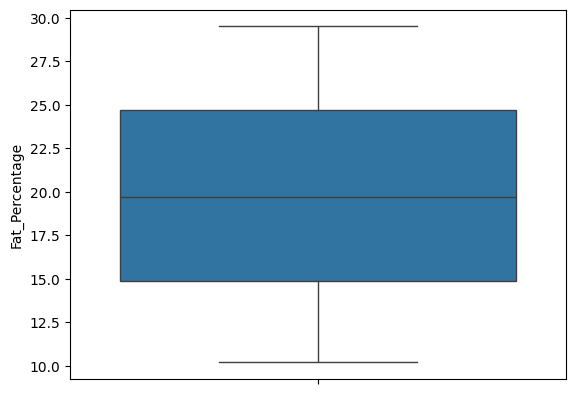

In [141]:
sns.boxplot(gym_df.Fat_Percentage)
plt.show()

In [142]:
# Mengisi value yang hilang pada kolom Fat_Percentage dengan nilai rerata
gym_df.Fat_Percentage = gym_df.Fat_Percentage.fillna(gym_df.Fat_Percentage.mean())

Kolom Water_Intake

In [144]:
gym_df['Water_Intake (liters)'].isna()

,Water_Intake (liters)
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


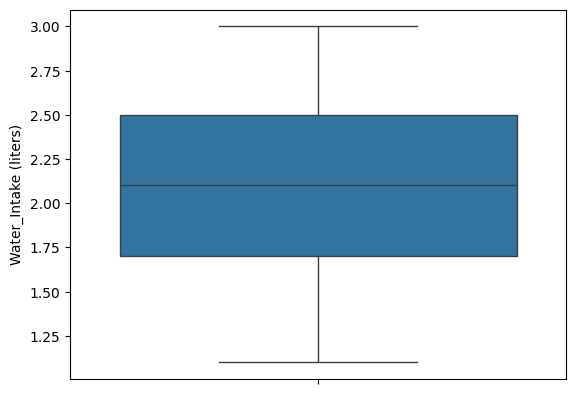

In [145]:
sns.boxplot(gym_df['Water_Intake (liters)'])
plt.show()

In [146]:
# Mengisi value yang hilang pada kolom Water_Intake dengan mean
gym_df['Water_Intake (liters)'] = gym_df['Water_Intake (liters)'].fillna(gym_df['Water_Intake (liters)'].mean())

Kolom Workout_Frequency

In [65]:
gym_df['Workout_Frequency (days/week)'].isna()

,Workout_Frequency (days/week)
0,False
1,False
2,False
3,False
4,False
...,...
95,True
96,False
97,False
98,False


In [152]:
gym_df['Workout_Frequency (days/week)'].value_counts()

,count
Workout_Frequency (days/week),
3,18
1,17
2,16
4,12
5,12
6,11
3,9


In [153]:
gym_df['Workout_Frequency (days/week)'] = gym_df['Workout_Frequency (days/week)'].replace({
    'three' : 3
})

In [154]:
gym_df['Workout_Frequency (days/week)'] = gym_df['Workout_Frequency (days/week)'].fillna(gym_df['Workout_Frequency (days/week)'].median())

Kolom Experience_Level

In [160]:
gym_df['Experience_Level'].isna()

,Experience_Level
0,False
1,False
2,False
3,False
4,False
...,...
95,True
96,False
97,False
98,False


In [162]:
# Mengisi value yang hilang menggunakan nilai median
gym_df.Experience_Level = gym_df.Experience_Level.fillna(gym_df.Experience_Level.median())

Kolom BMI

In [163]:
gym_df[gym_df.BMI.isna()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
17,41.0,Male,70.6,1.79,198.0,167.0,66.0,2.4,511.0,Strength,25.400000,2.089474,1,3.0,NaN
28,45.0,Female,62.1,1.54,169.0,131.0,74.0,1.5,333.0,Cardio,15.800000,2.600000,3,2.0,NaN
46,24.0,Female,74.7,1.60,209.0,140.0,71.0,1.7,449.0,Cardio,26.800000,2.200000,2,1.0,NaN
63,53.0,Female,59.4,1.77,190.0,142.0,72.0,0.9,330.0,Strength,19.664211,1.400000,2,2.0,NaN
65,48.0,Male,85.0,1.91,161.0,162.0,72.0,1.2,528.0,Strength,28.500000,2.000000,1,2.0,NaN


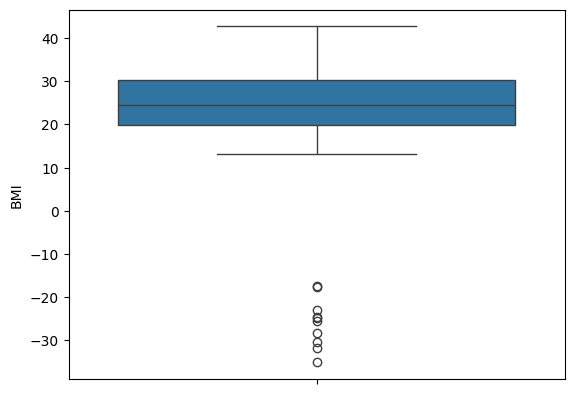

In [164]:
sns.boxplot(gym_df.BMI)
plt.show()

In [165]:
# Mengisi value yang hilang menggunakan nilai median karena terdapat outlier
gym_df.BMI = gym_df.BMI.fillna(gym_df.BMI.median())

# **Hasil Akhir setelah Data Cleaning**

In [171]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            100 non-null    float64
 1   Gender                         100 non-null    object 
 2   Weight (kg)                    100 non-null    float64
 3   Height (m)                     100 non-null    float64
 4   Max_BPM                        100 non-null    float64
 5   Avg_BPM                        100 non-null    float64
 6   Resting_BPM                    100 non-null    float64
 7   Session_Duration (hours)       100 non-null    float64
 8   Calories_Burned                100 non-null    float64
 9   Workout_Type                   100 non-null    object 
 10  Fat_Percentage                 100 non-null    float64
 11  Water_Intake (liters)          100 non-null    float64
 12  Workout_Frequency (days/week)  100 non-null    object 
 

In [172]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,37.86000,77.155435,1.727300,185.200000,149.115789,68.884211,1.492000,481.136842,19.664211,2.089474,2.00000,26.191111
std,12.17716,13.128551,0.140251,13.779358,16.507643,5.718768,0.528707,115.147741,5.353691,0.527520,0.80403,6.054494
min,18.00000,50.900000,1.500000,160.000000,120.000000,60.000000,0.500000,300.000000,10.200000,1.100000,1.00000,13.100000
25%,26.75000,67.375000,1.627500,174.500000,135.750000,64.000000,1.075000,388.000000,15.075000,1.700000,1.00000,22.275000
50%,38.00000,77.127717,1.710000,185.200000,149.057895,68.884211,1.500000,481.136842,19.664211,2.100000,2.00000,26.191111
75%,46.25000,86.200000,1.832500,195.000000,162.250000,74.000000,1.900000,577.250000,24.350000,2.500000,3.00000,29.700000
max,59.00000,99.900000,2.000000,209.000000,178.000000,79.000000,2.500000,693.000000,29.500000,3.000000,3.00000,42.700000
